### control_fixpd sims

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from palettable.colorbrewer.sequential import YlGn_9
from palettable.cmocean.sequential import Tempo_10

from ideotype.data_process import read_sims, read_data, parse_mature
from ideotype import DATA_PATH

In [2]:
# control_fixpd
df_sims, df_issues = read_sims('/home/disk/eos8/ach315/upscale/sims/control_fixpd')
df_sims.to_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/files/sims_6105_control_fixpd.csv', index=False)

In [4]:
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_control_fixpd.yml')
df_extended, df_stuck = parse_mature(df_all)

In [5]:
print(df_matured.shape[0]/df_all.shape[0])
print(df_extended.shape[0]/df_all.shape[0])
print(df_stuck.shape[0]/df_all.shape[0])

0.9883495145631068
0.0
0.011650485436893204


In [6]:
# Upscale yield from plant level (g/plant) to field level (tons/ha)
pop = 8  # plants/m2
ha_to_m2 = 10000
ton_to_g = 907185
ear_to_yield = 0.86  # only portion of ear converts into yield

Text(0.5, 1.0, 'mean simulated rainfed yield (tons/ha)')

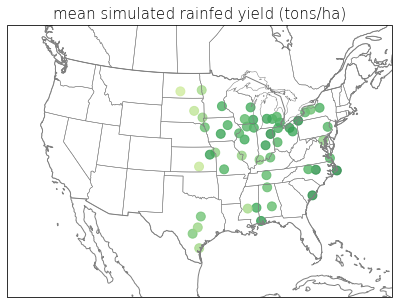

In [15]:
# Visualize
fig = plt.figure(figsize=(7,5))
extent = [-123, -72, 19, 53]

ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
    central_latitude=39.5, central_longitude=-98.35))
df_sub = df_all.groupby('site').mean()
sim_yield = [(ha_to_m2*pop*ear*ear_to_yield)/ton_to_g for ear in df_sub.dm_ear]

ax.scatter(df_sub.lon, df_sub.lat, 
           c=sim_yield, 
           cmap=YlGn_9.mpl_colormap,
           transform=ccrs.PlateCarree(), alpha=0.8, s=80,
           vmin=5, vmax=14)
ax.set_extent(extent)
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
ax.set_title('mean simulated rainfed yield (tons/ha)', fontsize=15, fontweight='light')

Text(0.5, 1.0, 'mean simulated rainfed yield (tons/ha)')

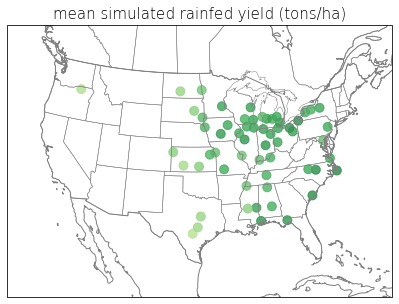

In [31]:
# Visualize
fig = plt.figure(figsize=(7,5))
extent = [-123, -72, 19, 53]

ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
    central_latitude=39.5, central_longitude=-98.35))
df_sub = df_all.groupby('site').mean()
sim_yield = [(ha_to_m2*pop*ear*ear_to_yield)/ton_to_g for ear in df_sub.dm_ear]

ax.scatter(df_sub.lon, df_sub.lat, 
           c=sim_yield, 
           cmap=YlGn_9.mpl_colormap,
           transform=ccrs.PlateCarree(), alpha=0.8, s=80,
           vmin=2, vmax=15)
ax.set_extent(extent)
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
ax.set_title('mean simulated rainfed yield (tons/ha)', fontsize=15, fontweight='light')

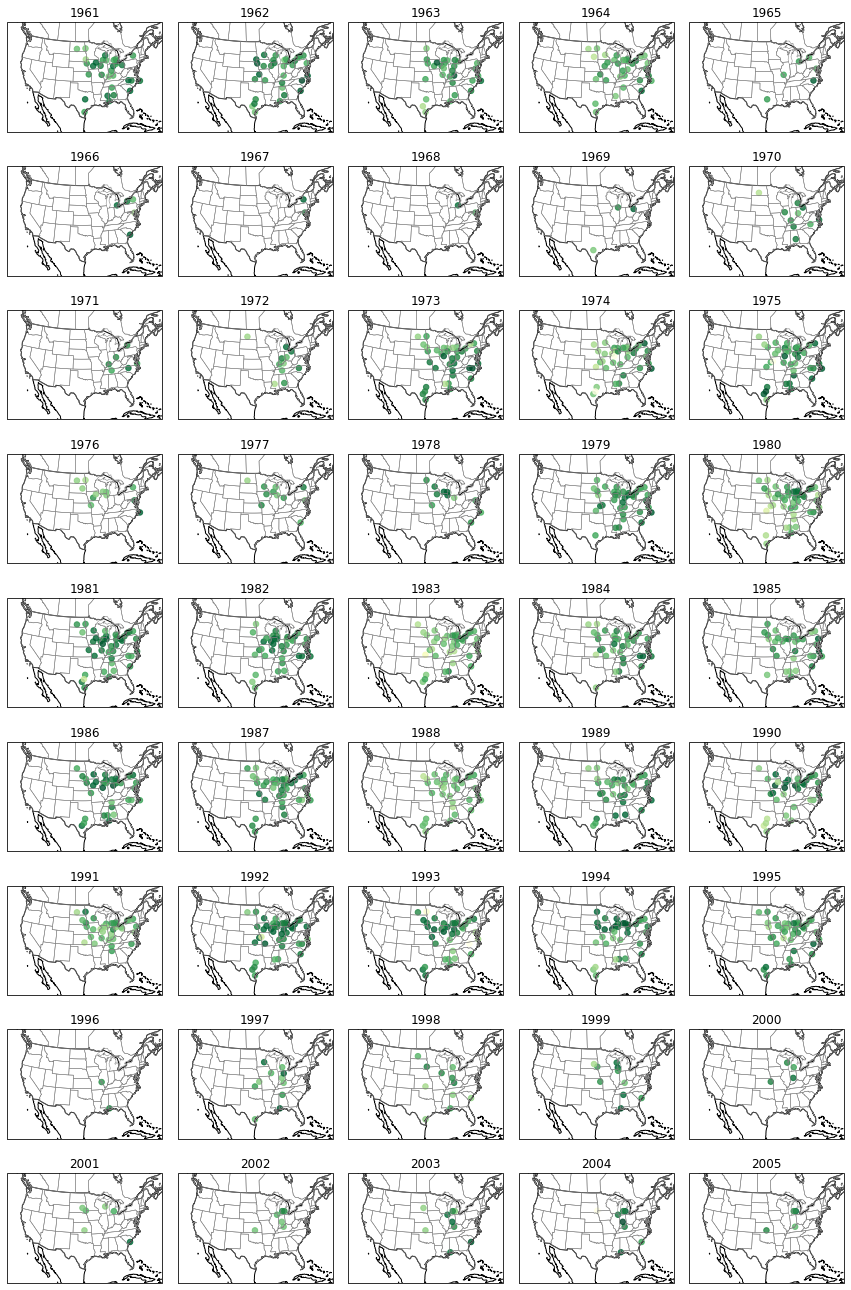

In [8]:
years = np.arange(1961, 2006)
extent = [-123, -72, 19, 53]

fig = plt.figure(figsize=(15,30))

for item, year in zip(np.arange(len(years)), years):
    ax = fig.add_subplot(9,5,item+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))
    df_sub = df_all[df_all.year == year]
    ax.scatter(df_sub.lon, df_sub.lat, 
               c=df_sub.dm_ear, cmap=YlGn_9.mpl_colormap,
               transform=ccrs.PlateCarree(), alpha=0.8, s=30,
               vmin=0, vmax=200) 

    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set(title=year)

fig.subplots_adjust(wspace=0.1, hspace=-0.7)

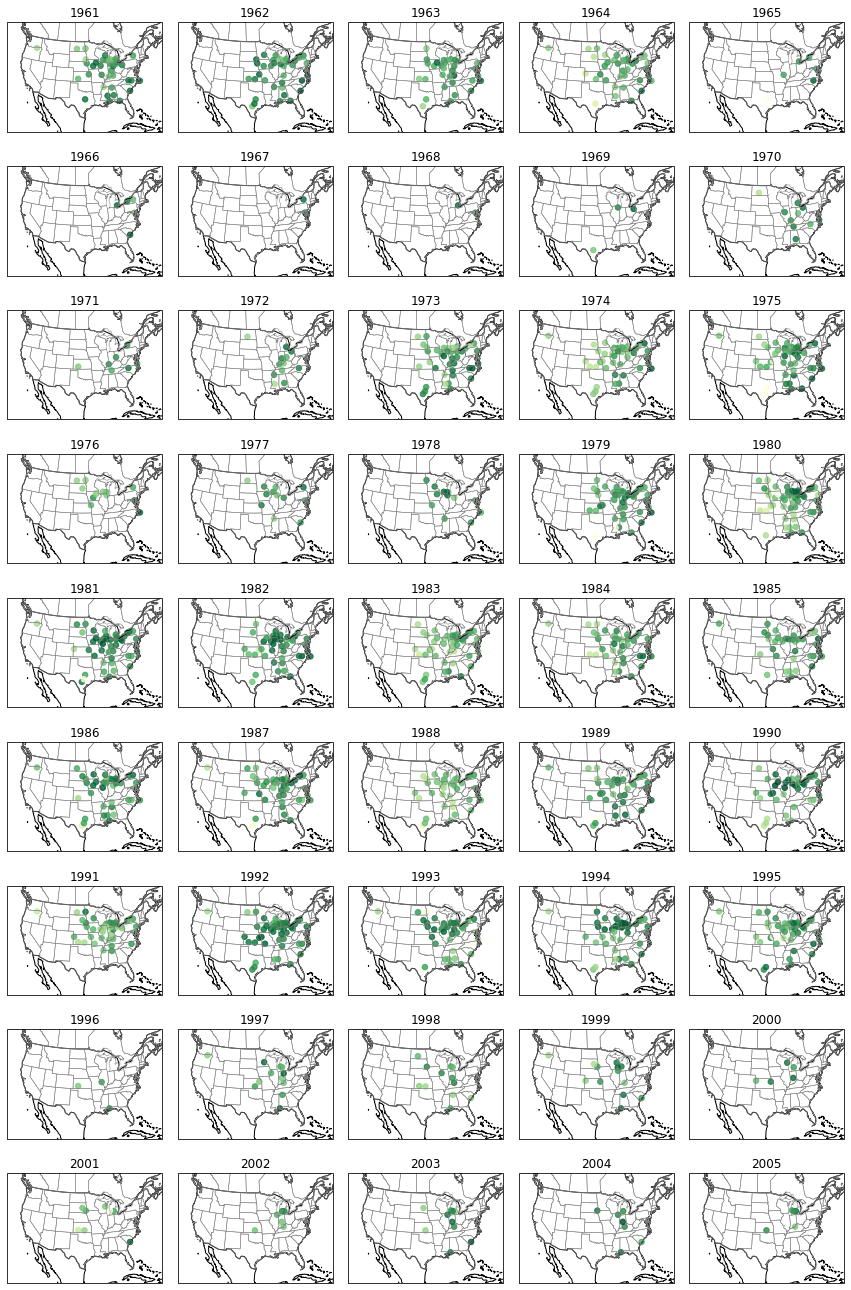

In [4]:
years = np.arange(1961, 2006)
extent = [-123, -72, 19, 53]

fig = plt.figure(figsize=(15,30))

for item, year in zip(np.arange(len(years)), years):
    ax = fig.add_subplot(9,5,item+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))
    df_sub = df_all[df_all.year == year]
    ax.scatter(df_sub.lon, df_sub.lat, 
               c=df_sub.dm_ear, cmap=YlGn_9.mpl_colormap,
               transform=ccrs.PlateCarree(), alpha=0.8, s=30,
               vmin=0, vmax=200) 

    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set(title=year)

fig.subplots_adjust(wspace=0.1, hspace=-0.7)